# Chargement des données


In [ ]:
!git clone https://github.com/Romain-Malinge/Deep_learning_groupe_A_smalldataset.git
path = "./Deep_learning_groupe_A_smalldataset/BD/"

Cloning into 'Deep_learning_groupe_A_smalldataset'...
remote: Enumerating objects: 5122, done.
remote: Total 5122 (delta 0), reused 0 (delta 0), pack-reused 5122
Receiving objects: 100% (5122/5122), 324.17 MiB | 35.59 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (7672/7672), done.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import glob
import PIL
from PIL import Image
import numpy as np
from tensorflow.keras import optimizers
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from keras import regularizers

Voici ensuite un exemple de chargement de vos données. Notez que vous pouvez modifier la dimension des images, ce qui sera utile à différents stades de votre projet.

In [ ]:
row = 192
col = 256

datagen = ImageDataGenerator(rescale=1./255)

train_dir = path + 'entrainement'
val_dir = path + 'validation'
test_dir = path + 'test'

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(row,col),
    batch_size=20,
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(row,col),
    batch_size=20,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(row,col),
    batch_size=20,
    class_mode='categorical'
)

Found 4000 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.
Found 100 images belonging to 4 classes.


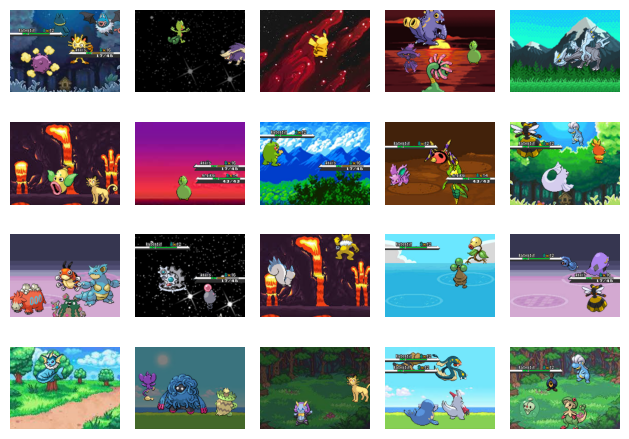

In [ ]:
for i in range(20):
    img, label = train_generator.next()
    plt.subplot(4, 5, i+1)
    plt.axis('off')
    plt.imshow(img[0])


plt.tight_layout()
plt.show()

Vous pouvez utiliser le bloc suivant pour afficher quelques-unes de vos images, et ainsi vérifier que tout s'est bien passé.

#  Création de notre réseau de neurones

Dans un premier temps nous allons utiliser un réseau basique et voir les résultats.

In [ ]:
model = Sequential()
# 1er couche
model.add(Conv2D(32, (3,3), input_shape = [row, col,3], activation='relu'))
model.add(MaxPooling2D(2,2))
# 2nd couche
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
# 3eme couche
model.add(Conv2D(96, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
# 4eme couche
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())    # "Mise à plat" (vectorisation) du tenseur pour permettre de la connecter à une couche dense

model.add(Dense(512, activation='relu')) # input_dim indique la dimension de la couche d'entrée, ici 512
model.add(Dense(100, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 190, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 95, 127, 32)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 93, 125, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 46, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 60, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 22, 30, 96)        0

In [ ]:
# Fonction cout
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])

In [ ]:
# Analyse de notre modèle
history = model.fit(train_generator,
                    batch_size=10,
                    epochs=15,
                    validation_data=val_generator)

Epoch 1/15
200/200 [==============================] - 28s 94ms/step - loss: 0.5299 - accuracy: 0.3585 - val_loss: 0.4478 - val_accuracy: 0.5090
Epoch 2/15
200/200 [==============================] - 22s 110ms/step - loss: 0.4219 - accuracy: 0.5408 - val_loss: 0.4694 - val_accuracy: 0.4600
Epoch 3/15
200/200 [==============================] - 19s 93ms/step - loss: 0.3661 - accuracy: 0.6230 - val_loss: 0.3376 - val_accuracy: 0.6790
Epoch 4/15
200/200 [==============================] - 19s 94ms/step - loss: 0.3177 - accuracy: 0.6957 - val_loss: 0.3200 - val_accuracy: 0.6790
Epoch 5/15
200/200 [==============================] - 19s 94ms/step - loss: 0.2635 - accuracy: 0.7588 - val_loss: 0.3026 - val_accuracy: 0.7160
Epoch 6/15
200/200 [==============================] - 21s 105ms/step - loss: 0.2265 - accuracy: 0.8040 - val_loss: 0.2950 - val_accuracy: 0.7010
Epoch 7/15
200/200 [==============================] - 19s 93ms/step - loss: 0.1677 - accuracy: 0.8680 - val_loss: 0.3238 - val_accurac

In [ ]:
def plot_training_analysis():
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

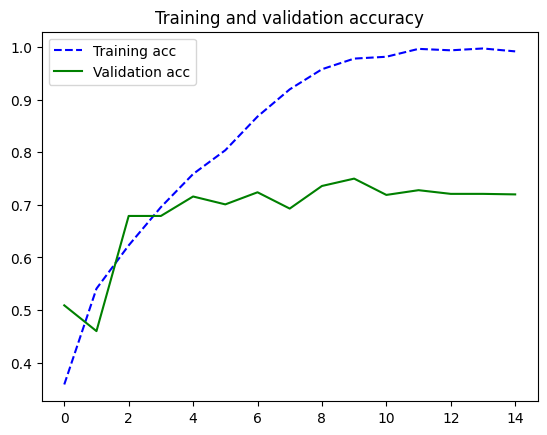

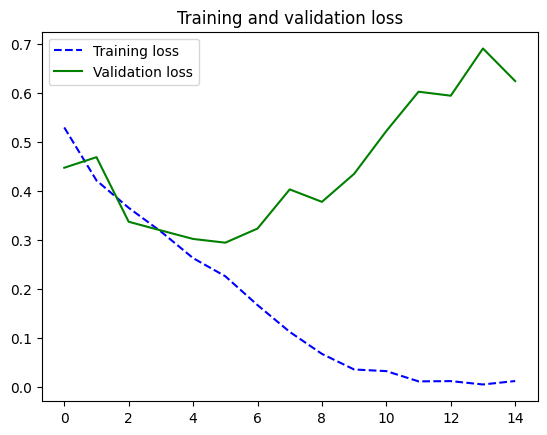

In [ ]:
# Affichage du training
plot_training_analysis()

Pour les données de test, il faudra utiliser un evaluate.
Le code suivant ne fonctionne pas.


In [ ]:
results = model.evaluate(test_generator)
print("test loss, test acc:", results)

# resultat test : 40 %

5/5 [==============================] - 1s 158ms/step - loss: 4.2895 - accuracy: 0.4000
test loss, test acc: [4.289530277252197, 0.4000000059604645]


In [ ]:
import numpy as np

# Initialiser les listes pour stocker les étiquettes vraies et les prédictions
true_labels_all = []
predicted_classes_all = []
total_batches = len(val_generator)
i = 0
max_batches = 50

# Itérer sur toutes les données de val_generator
for images, labels in val_generator:
    print('Processing batch', i+1, 'out of', total_batches)

    # Prédire les classes pour le lot actuel
    predictions = model.predict(images)

    # Convertir les étiquettes en classes
    labels = np.argmax(labels, axis=1)
    predicted_classes = np.argmax(predictions, axis=1)

    # Ajouter les étiquettes et les prédictions aux listes
    true_labels_all.extend(labels)
    predicted_classes_all.extend(predicted_classes)

    i += 1

    if i >= max_batches:
        break

# Convertir en tableaux numpy pour le calcul de l'accuracy
true_labels_all = np.array(true_labels_all)
predicted_classes_all = np.array(predicted_classes_all)

# Calcul de l'accuracy pour l'ensemble de val_generator
correct_predictions = np.sum(predicted_classes_all == true_labels_all)
accuracy = correct_predictions / len(true_labels_all)

# Affichage de l'accuracy
print("Accuracy for the first", max_batches, "batches in val_generator:", accuracy)


Processing batch 1 out of 50
1/1 [==============================] - 0s 141ms/step
Processing batch 2 out of 50
1/1 [==============================] - 0s 36ms/step
Processing batch 3 out of 50
1/1 [==============================] - 0s 24ms/step
Processing batch 4 out of 50
1/1 [==============================] - 0s 24ms/step
Processing batch 5 out of 50
1/1 [==============================] - 0s 27ms/step
Processing batch 6 out of 50
1/1 [==============================] - 0s 26ms/step
Processing batch 7 out of 50
1/1 [==============================] - 0s 32ms/step
Processing batch 8 out of 50
1/1 [==============================] - 0s 34ms/step
Processing batch 9 out of 50
1/1 [==============================] - 0s 25ms/step
Processing batch 10 out of 50
1/1 [==============================] - 0s 24ms/step
Processing batch 11 out of 50
1/1 [==============================] - 0s 27ms/step
Processing batch 12 out of 50
1/1 [==============================] - 0s 24ms/step
Processing batch 13 out 

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

# Calcul de la matrice de confusion
cm = confusion_matrix(true_labels_all, predicted_classes_all)

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[212  37   0   0]
 [ 25 195  37   1]
 [  1  58 142  44]
 [  0   7  70 171]]


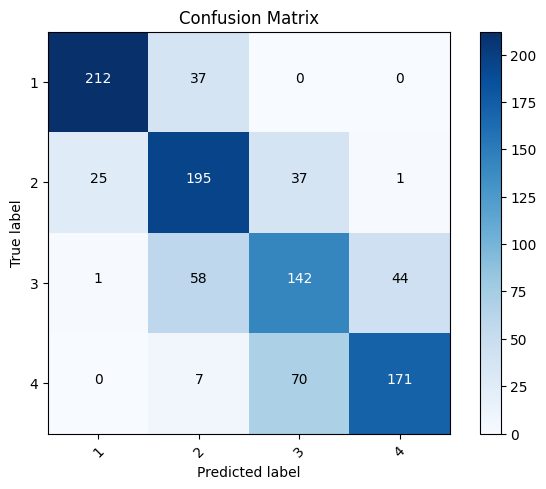

In [ ]:
cm_plot_labels = ['1','2','3','4']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')